In [1]:
cd("/Users/elfflorin/Documents/Projects/julia.hw/jpie");
using Lexicon;
using brml;


Available Demos:

demoBurglar.jl
demoBurglarDictPot.jl
demoBurglarSimple.jl
demoChainIndepRational.jl
demoHMMInferenceFG.jl
demoHMMInferenceSimple.jl
demoHMMLearn.jl
demoMaxProd.jl
demoPlotDAG.jl
demoPotLogArray.jl
demoSumProd.jl
demoSumProdStandardiseVariables.jl


INFO: Loading help data...


The domain for visible states: $V = \{1, 2, 3, 4, 5\}$  <br/>
The domain for hidden states: $H = \{1, 2, 3, 4, 5, 6, 7, 8, 9, 10\}$ <br/>
The number of timesteps: $T = 20$

In [2]:
V = 5  # number of visible states
H = 10 # number of hidden states
T = 20 # number of timesteps

20

Initialize the time-series vectors **h, v** for the hidden and visible variables

In [3]:
h = zeros(Integer,1,T) # holds the state value for the hidden variable at a specific timestep
v = zeros(Integer,1,T) # holds the state value for the visible variable at a specific timestep

1x20 Array{Integer,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

The probabilities for the hidden variable states at timestep 1: $p(h_{1})$ 

In [4]:
ph1 = condp(rand(H,1)) # probabilities for the states of the hidden variable at timestep 1

10x1 Array{Float64,2}:
 0.110904 
 0.03057  
 0.0990172
 0.148372 
 0.025506 
 0.0402466
 0.130892 
 0.0571803
 0.13815  
 0.219162 

Initialize the transition matrix **$phghm_{10x10}$** with
$$\begin{eqnarray}
  phghm(i, j) = p(h_t = i | h_{t-1} = j) \\
  \sum_{i = 1}^{10} phghm(i, j) = 1
 \end{eqnarray}
$$

In [5]:
phghm=condp(eye(H,H)) # transition matrix with sum(phghm, 1) = 1 with phghm[i, j] = p(hg=i | hm=j)
# shuffle the column data in phghm while keeping sum(phghm, 1) = 1
# done as below no 2 columns have value 1.0 on the same row
phghmtmp=condp(eye(H,H))
r = randperm(H)
for (i, value) in enumerate(r)
    phghm[:, i] = phghmtmp[:, value]
end
phghm

10x10 Array{Float64,2}:
 2.22507e-308  2.22507e-308  2.22507e-308  …  2.22507e-308  2.22507e-308
 1.0           2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  1.0              2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308  …  1.0           2.22507e-308
 2.22507e-308  1.0           2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  1.0         
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308

Initialize the emission matrix **$pvgh \in R^{5x10}$** with
$$\begin{eqnarray}
  pvgh(i, j) = p(v_t = i | h_{t} = j) \\
  \sum_{i = 1}^{5} pvgh(i, j) = 1
 \end{eqnarray}
$$

In [6]:
pvgh=condp((rand(V,H))) # emision matrix with sum(pvgh, 1) = 1 with pvgh[i, j] = p(vg = i | h = j)

5x10 Array{Float64,2}:
 0.254763   0.270081   0.12941    …  0.203513   0.322304   0.283919 
 0.25293    0.205646   0.265677      0.325654   0.238581   0.148964 
 0.274729   0.293715   0.0729654     0.0853587  0.208399   0.0332632
 0.143769   0.196643   0.256678      0.156557   0.20084    0.23667  
 0.0738085  0.0339154  0.275271      0.228918   0.0298755  0.297184 

In [7]:
h[1]=randgen(ph1) # initialize the hidden variable @t=1 with a random state based on ph1 distribution
v[1]=randgen(pvgh[:,h[1]]) # initialize the visible variable @t=1 with a random state based on pvgh( vg | h@t=1)

for t=2:T
    h[t]=randgen(phghm[:,h[t-1]]) # set the hidden variable state @t based on h@t-1 using the transition matrix
    v[t]=randgen(pvgh[:,h[t]]) # set the visible variable state @t based on h@t using the emission matrix
end

In [8]:
(alpha, loglik) = HMMforward(v, phghm, ph1, pvgh); # filtering
println("Log Likelihood = $loglik")

Log Likelihood = -31.478666424417938


In [9]:
gamma = HMMsmooth(v, phghm, ph1, pvgh, alpha); # smoothing

10x20 Array{Float64,2}:
 4.97624e-5   0.00167822   0.893606     …  0.893606     0.000336707
 0.000336707  4.97624e-5   0.00167822      0.00167822   0.893606   
 0.0111985    0.0111985    0.0111985       0.0111985    0.0111985  
 0.0919732    4.27125e-6   0.0919732       0.0919732    4.27125e-6 
 4.27125e-6   0.0919732    4.27125e-6      4.27125e-6   0.0919732  
 0.000629177  0.000123919  0.000399748  …  0.000629177  0.000123919
 0.893606     0.000336707  4.97624e-5      4.97624e-5   0.00167822 
 0.00167822   0.893606     0.000336707     0.000336707  4.97624e-5 
 0.000123919  0.000399748  0.000629177     0.000123919  0.000399748
 0.000399748  0.000629177  0.000123919     0.000399748  0.000629177

In [10]:
(maxstate, logprob) = HMMviterbi(v, phghm, ph1, pvgh)
println("most likely path (viterbi):")
println(maxstate)

most likely path (viterbi):
[7 8 1 2 7 8 1 2 7 8 1 2 7 8 1 2 7 8 1 2]


In [11]:
println("original path (hidden states):")
println(h)

original path (hidden states):
Integer[7 8 1 2 7 8 1 2 7 8 1 2 7 8 1 2 7 8 1 2]


In [12]:
println("original path (visible states):")
println(v)

original path (visible states):
Integer[2 2 1 1 5 2 5 4 5 5 1 2 3 5 3 2 2 5 3 3]


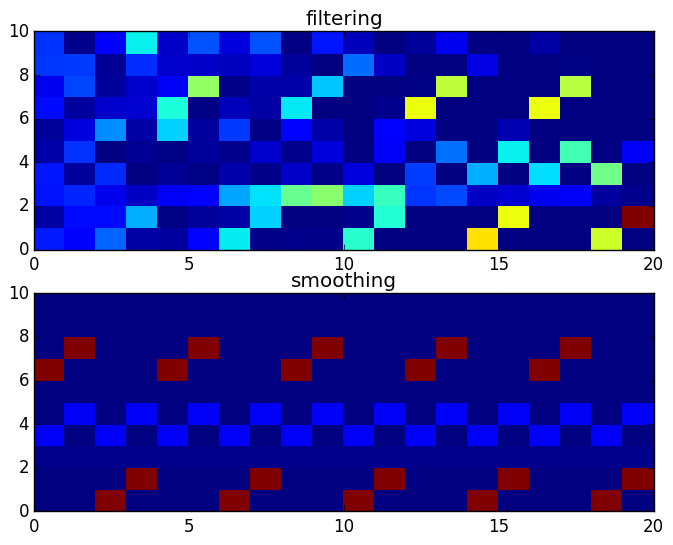

PyObject <matplotlib.collections.PolyCollection object at 0x11a4e7650>

In [15]:
    PyPlot.figure()
    ax = PyPlot.subplot(2, 1, 1)
    ax[:set_title]("filtering")
    PyPlot.pcolor(alpha)
    ax = PyPlot.subplot(2, 1, 2)
    ax[:set_title]("smoothing")
    PyPlot.pcolor(gamma)